In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
combined = pd.read_csv('combined_data.csv')

In [3]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 16 columns):
age                              1133 non-null object
career_move_to_private_sector    1133 non-null bool
career_move_to_public_sector     1133 non-null bool
cease_date                       1133 non-null int64
dissatisfaction                  1133 non-null bool
employment_status                1133 non-null object
gender                           1133 non-null object
id                               1133 non-null float64
ill_health                       1133 non-null bool
institute                        1133 non-null object
institute_service                1133 non-null object
maternity/family                 1133 non-null bool
none_of_the_above                1133 non-null bool
position                         1133 non-null object
separation_type                  1133 non-null object
study/travel                     1133 non-null bool
dtypes: bool(7), float64(1), int64(1), obje

The data above is the combined relevant data from the TAFE and DETE exit surveys  
  
    

## Institute Service

In [4]:
combined_pv = (combined.pivot_table(values = 'dissatisfaction', 
                                    index='institute_service'))
combined_pv

,dissatisfaction
institute_service,
Established,0.458333
Experienced,0.349138
New,0.292181
Veteran,0.475089


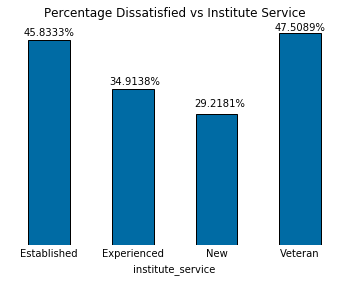

In [5]:
ax = combined_pv.plot(kind='bar', rot = 360, legend=False, color=(0, 107/255, 164/255))
ax.tick_params(bottom="off", left="off", top="off", right="off")
for key, spine in ax.spines.items():
    spine.set_visible(False)
ax.text(-0.3,0.47, '45.8333%')
ax.text(0.72,0.36, '34.9138%')
ax.text(1.73, 0.31, '29.2181%')
ax.text(2.7,0.48, '47.5089%')
ax.yaxis.set_ticklabels([])
ax.title.set_text('Percentage Dissatisfied vs Institute Service')


The percentage of dissatisfied employees increases the longer that they work for either TAFE or DETE

## Age

In [6]:
combined_pv = (combined.pivot_table(values = 'dissatisfaction', 
                                    index='age'))
combined_pv

,dissatisfaction
age,
20 or younger,0.300000
21-25,0.319444
26-30,0.425287
31-35,0.369863
36-40,0.337349
41-45,0.386792
46-50,0.424242
51-55,0.489796
56-60,0.449393


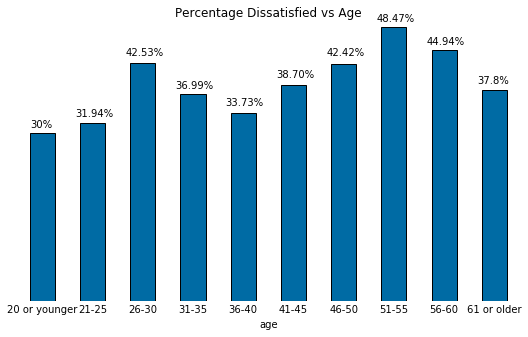

In [7]:
ax = combined_pv.plot(kind='bar', rot = 360, legend=False, color=(0, 107/255, 164/255), figsize=(9,5))
ax.tick_params(bottom="off", left="off", top="off", right="off")
for key, spine in ax.spines.items():
    spine.set_visible(False)
ax.text(-0.25,0.31, '30%')
ax.text(0.65,0.33, '31.94%')
ax.text(1.65, 0.44, '42.53%')
ax.text(2.65,0.38, '36.99%')
ax.text(3.65,0.35, '33.73%')
ax.text(4.65,0.4, '38.70%')
ax.text(5.65,0.44, '42.42%')
ax.text(6.65,0.5, '48.47%')
ax.text(7.65,0.46, '44.94%')
ax.text(8.65,0.39, '37.8%')
ax.yaxis.set_ticklabels([])
ax.title.set_text('Percentage Dissatisfied vs Age')

Dissatisfaction peaks in the age bracket of 26-30 and 51-55, with 51-55 slightly higher.  
36-40 has a local dip 

## TAFE Only

In [8]:
tafe_pv = (combined[combined['institute'] =='TAFE'].pivot_table(values = 'dissatisfaction', 
                                                     index = 'institute_service'));
tafe_pv


,dissatisfaction
institute_service,
Established,0.333333
Experienced,0.268519
New,0.289655
Veteran,0.257732


In [9]:
dete_pv = (combined[combined['institute'] =='DETE'].pivot_table(values = 'dissatisfaction', 
                                                     index = 'institute_service'));
dete_pv

,dissatisfaction
institute_service,
Established,0.515152
Experienced,0.419355
New,0.295918
Veteran,0.520430


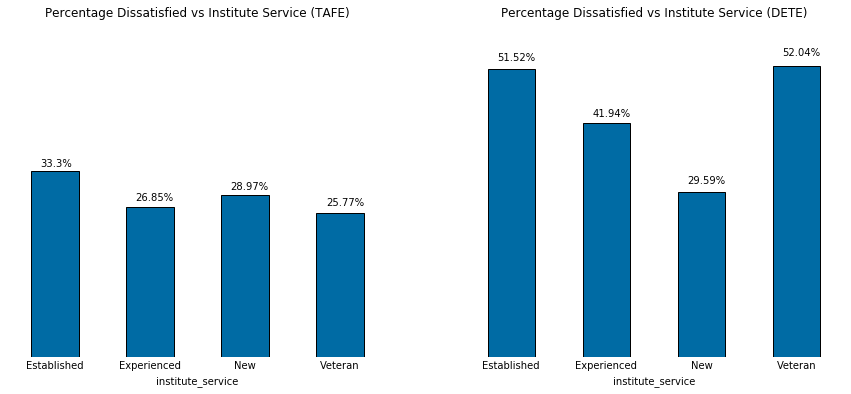

In [21]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(7,7))

ax1 = tafe_pv.plot(ax = axes[0],kind='bar', rot = 360, legend=False, color=(0, 107/255, 164/255), figsize=(15,6))
ax1.tick_params(bottom="off", left="off", top="off", right="off")
for key, spine in ax1.spines.items():
    spine.set_visible(False)
ax1.text(-0.15,0.34, '33.3%')
ax1.text(0.85,0.28, '26.85%')
ax1.text(1.85,0.3, '28.97%')
ax1.text(2.85,0.27, '25.77%')
ax1.set_ylim([0,0.6])

ax1.yaxis.set_ticklabels([])
ax1.title.set_text('Percentage Dissatisfied vs Institute Service (TAFE)')

ax2 = dete_pv.plot(ax = axes[1], kind='bar', rot = 360, legend=False, color=(0, 107/255, 164/255), figsize=(15,6))
ax2.tick_params(bottom="off", left="off", top="off", right="off")
for key, spine in ax2.spines.items():
    spine.set_visible(False)
ax2.text(-0.15,0.53, '51.52%')
ax2.text(0.85,0.43, '41.94%')
ax2.text(1.85,0.31, '29.59%')
ax2.text(2.85,0.54, '52.04%')
ax2.set_ylim([0,0.6])
ax2.yaxis.set_ticklabels([])

ax2.title.set_text('Percentage Dissatisfied vs Institute Service (DETE)')

Employees of DETE have higher rates of dissatisfaction